In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import csv
import pandas as pd
import os
import re
from scipy.io import loadmat
import getopt, sys

## Create labels

Before creating the labels the folder structure should be as in crowdhuman, i.e. one folder called images with subfolders train and val, containing single .jpg images.

And similarly one empty folder called labels_with_ids with subfolders train and val in which one .txt file for each .jpg file will be saved.

In [168]:
data_root = "/local_datasets/OpenMonkeyStudio/"

In [169]:
data = loadmat(data_root + 'Data.mat')

In [170]:
img_ids = [data['T'][0][0]['name'][i][0][0] for i in range(len(data['T'][0][0]['name']))]
labels = data['T'][0][0]['data']

In [171]:
print(len(img_ids))
print(len(labels))

194518
194518


### Try one image

In [141]:
img_id = data['T'][0][0]['name'][512][0][0]
label = data['T'][0][0]['data'][512]

img_name = data_root + 'images/' + img_id
img = np.asarray(Image.open(img_name))
jt_loc = {}
img_h = label[2]
img_w = label[3]

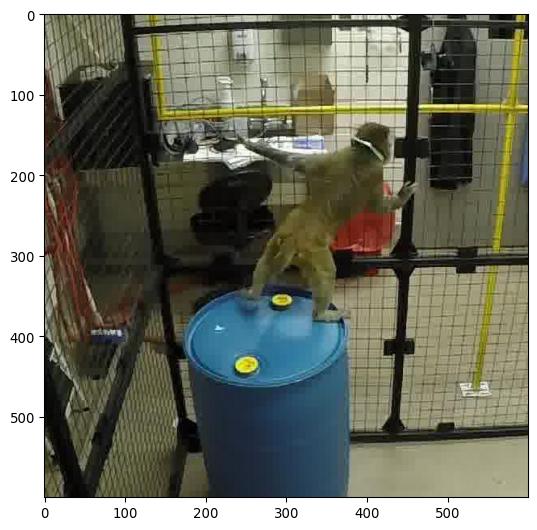

In [142]:
fig, ax = plt.subplots(figsize=(640/96, 640/96), dpi=96)
ax.imshow(img)

In [143]:
img_h = label[2]
img_w = label[3]

img_id = re.sub("[.]jpg","", img_id)

for j in range(13):
    jt_loc[j] = (label[5+2*j],label[4+2*j])
    
jt_loc = list(jt_loc.values())

xmax = max(sublist[0] for sublist in jt_loc)
ymax = max(sublist[1] for sublist in jt_loc)
xmin = min(sublist[0] for sublist in jt_loc)
ymin = min(sublist[1] for sublist in jt_loc)

print(jt_loc)
print(ymin)
x_center = (xmin + (xmax - xmin)/2)/img_w
y_center = (ymin + (ymax - ymin)/2)/img_h

label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
            i_monkey, x_center, y_center, w, h)

print(xmax)
label_str

[(421, 164), (411, 144), (400, 173), (409, 203), (447, 223), (364, 180), (262, 165), (311, 277), (345, 326), (351, 378), (266, 310), (241, 353), (277, 334)]
144
447


'0 194518 0.573333 0.435000 0.462500 0.171504\n'

### All images

In [172]:
i_monkey = 0

for img_id, label in zip(img_ids, labels):

    img_name = data_root + 'images/' + img_id
    img = np.asarray(Image.open(img_name))
    jt_loc = {}
    img_h = label[2]
    img_w = label[3]

    img_id = re.sub("[.]jpg","", img_id)

    for j in range(13):
        jt_loc[j] = (label[5+2*j],label[4+2*j])

    jt_loc = list(jt_loc.values())
    
    #get maximal values of keypoints
    xmax = max(sublist[0] for sublist in jt_loc)
    ymax = max(sublist[1] for sublist in jt_loc)
    xmin = min(sublist[0] for sublist in jt_loc)
    ymin = min(sublist[1] for sublist in jt_loc)
    
    x_center = (xmin + (xmax - xmin)/2)/img_w
    y_center = (ymin + (ymax - ymin)/2)/img_h
    w = (xmax - xmin)/img_w
    h = (ymax - ymin)/img_h


    #Label-String schreiben.
    label_fpath = data_root + "labels_with_ids/" + img_id +'.txt'



    label_str = '0 {:d} {:.6f} {:.6f} {:.6f} {:.6f}\n'.format(
            i_monkey, x_center, y_center, w * 1.05, h * 1.05)

    with open(label_fpath, 'a') as f:
        f.write(label_str)

    i_monkey += 1
    if i_monkey % 10000 == 0:
        print(i_monkey)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [173]:
for img_id in img_ids:
    if "batch11" in img_id:
        label_fpath = "/usr/users/vogg/FairMOT/src/data/openmonkeystudio.val"

        label_str =  "OpenMonkeyStudio/images/" + img_id + "\n"

        with open(label_fpath, 'a') as f:
            f.write(label_str)
    else:
        label_fpath = "/usr/users/vogg/FairMOT/src/data/openmonkeystudio.train"

        label_str =  "OpenMonkeyStudio/images/" + img_id + "\n"

        with open(label_fpath, 'a') as f:
            f.write(label_str)